In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
def particlesPair(pdgID,file_name):
    inv_mass = {}
    for iD in pdgID:
        inv_mass[iD] = []
        
    for e,event in enumerate(pylheV.readLHE(file_name)):
        leptonDict = {}
        for iD in pdgID:
            leptonDict[iD] = []
            leptonDict[-iD] = []
        
        
        for ptc in event.particles:
            if (ptc.status > 0) and (leptonDict.get(ptc.id,0) != 0):
                    leptonDict[ptc.id] = leptonDict[ptc.id] +  [[ptc.e,ptc.px,ptc.py,ptc.pz]]
                    
        for iD in pdgID:  
            len_particle = len(leptonDict[iD])
            len_antiparticle = len(leptonDict[iD])
            if (len_particle == len_antiparticle):
                for i in range(len_particle):
                    inv_mass[iD] = inv_mass[iD] + [invariant_mass(leptonDict[iD] + leptonDict[-iD])]
            elif (len_particle < len_antiparticle):
                for i in range(len_particle):
                    inv_mass[iD] = inv_mass[iD] + [invariant_mass(leptonDict[iD] + leptonDict[-iD])]
            else:
                for i in range(len_antiparticle):
                    inv_mass[iD] = inv_mass[iD] + [invariant_mass(leptonDict[iD] + leptonDict[-iD])]
        
    return inv_mass

In [3]:
def invariant_mass(ptc_list):
    
    energy = 0
    px = 0
    py = 0
    pz = 0
    for ptc in ptc_list:
        energy = energy +  ptc[0]
        px = px + ptc[1]
        py =py +  ptc[2]
        pz = pz + ptc[3]
        
    m_square = energy**2 - px**2 - py**2 - pz**2
    if m_square >= 0:
        return np.sqrt(m_square)
    else:
        return

In [4]:
mDict = {r'$m_{l^+l^-}$':[],r'$m_{q\bar{q}}$':[],r'$m_{\nu\bar{\nu}}$':[]}

In [5]:
#Invariant mass of a lepton pair
iDl = [11,13,15]

mDict[r'$m_{l^+l^-}$'] = [particlesPair(iDl,'input_80GeV.lhe'), particlesPair(iDl,'input_85GeV.lhe'), particlesPair(iDl,'input_90GeV.lhe'), particlesPair(iDl,'input_95GeV.lhe'), particlesPair(iDl,'input_100GeV.lhe')]

In [6]:
#Invariant mass of a quark pair
iDq = [1,2,3,4,5,6]

mDict[r'$m_{q\bar{q}}$'] = [particlesPair(iDq,'input_80GeV.lhe'), particlesPair(iDq,'input_85GeV.lhe'), particlesPair(iDq,'input_90GeV.lhe'), particlesPair(iDq,'input_95GeV.lhe'), particlesPair(iDq,'input_100GeV.lhe')]


In [7]:
#Invariant mass of a neutrino pair
iDn = [12,14,16]

mDict[r'$m_{\nu\bar{\nu}}$'] = [particlesPair(iDn,'input_80GeV.lhe'), particlesPair(iDn,'input_85GeV.lhe'), particlesPair(iDn,'input_90GeV.lhe'), particlesPair(iDn,'input_95GeV.lhe'), particlesPair(iDn,'input_100GeV.lhe')]



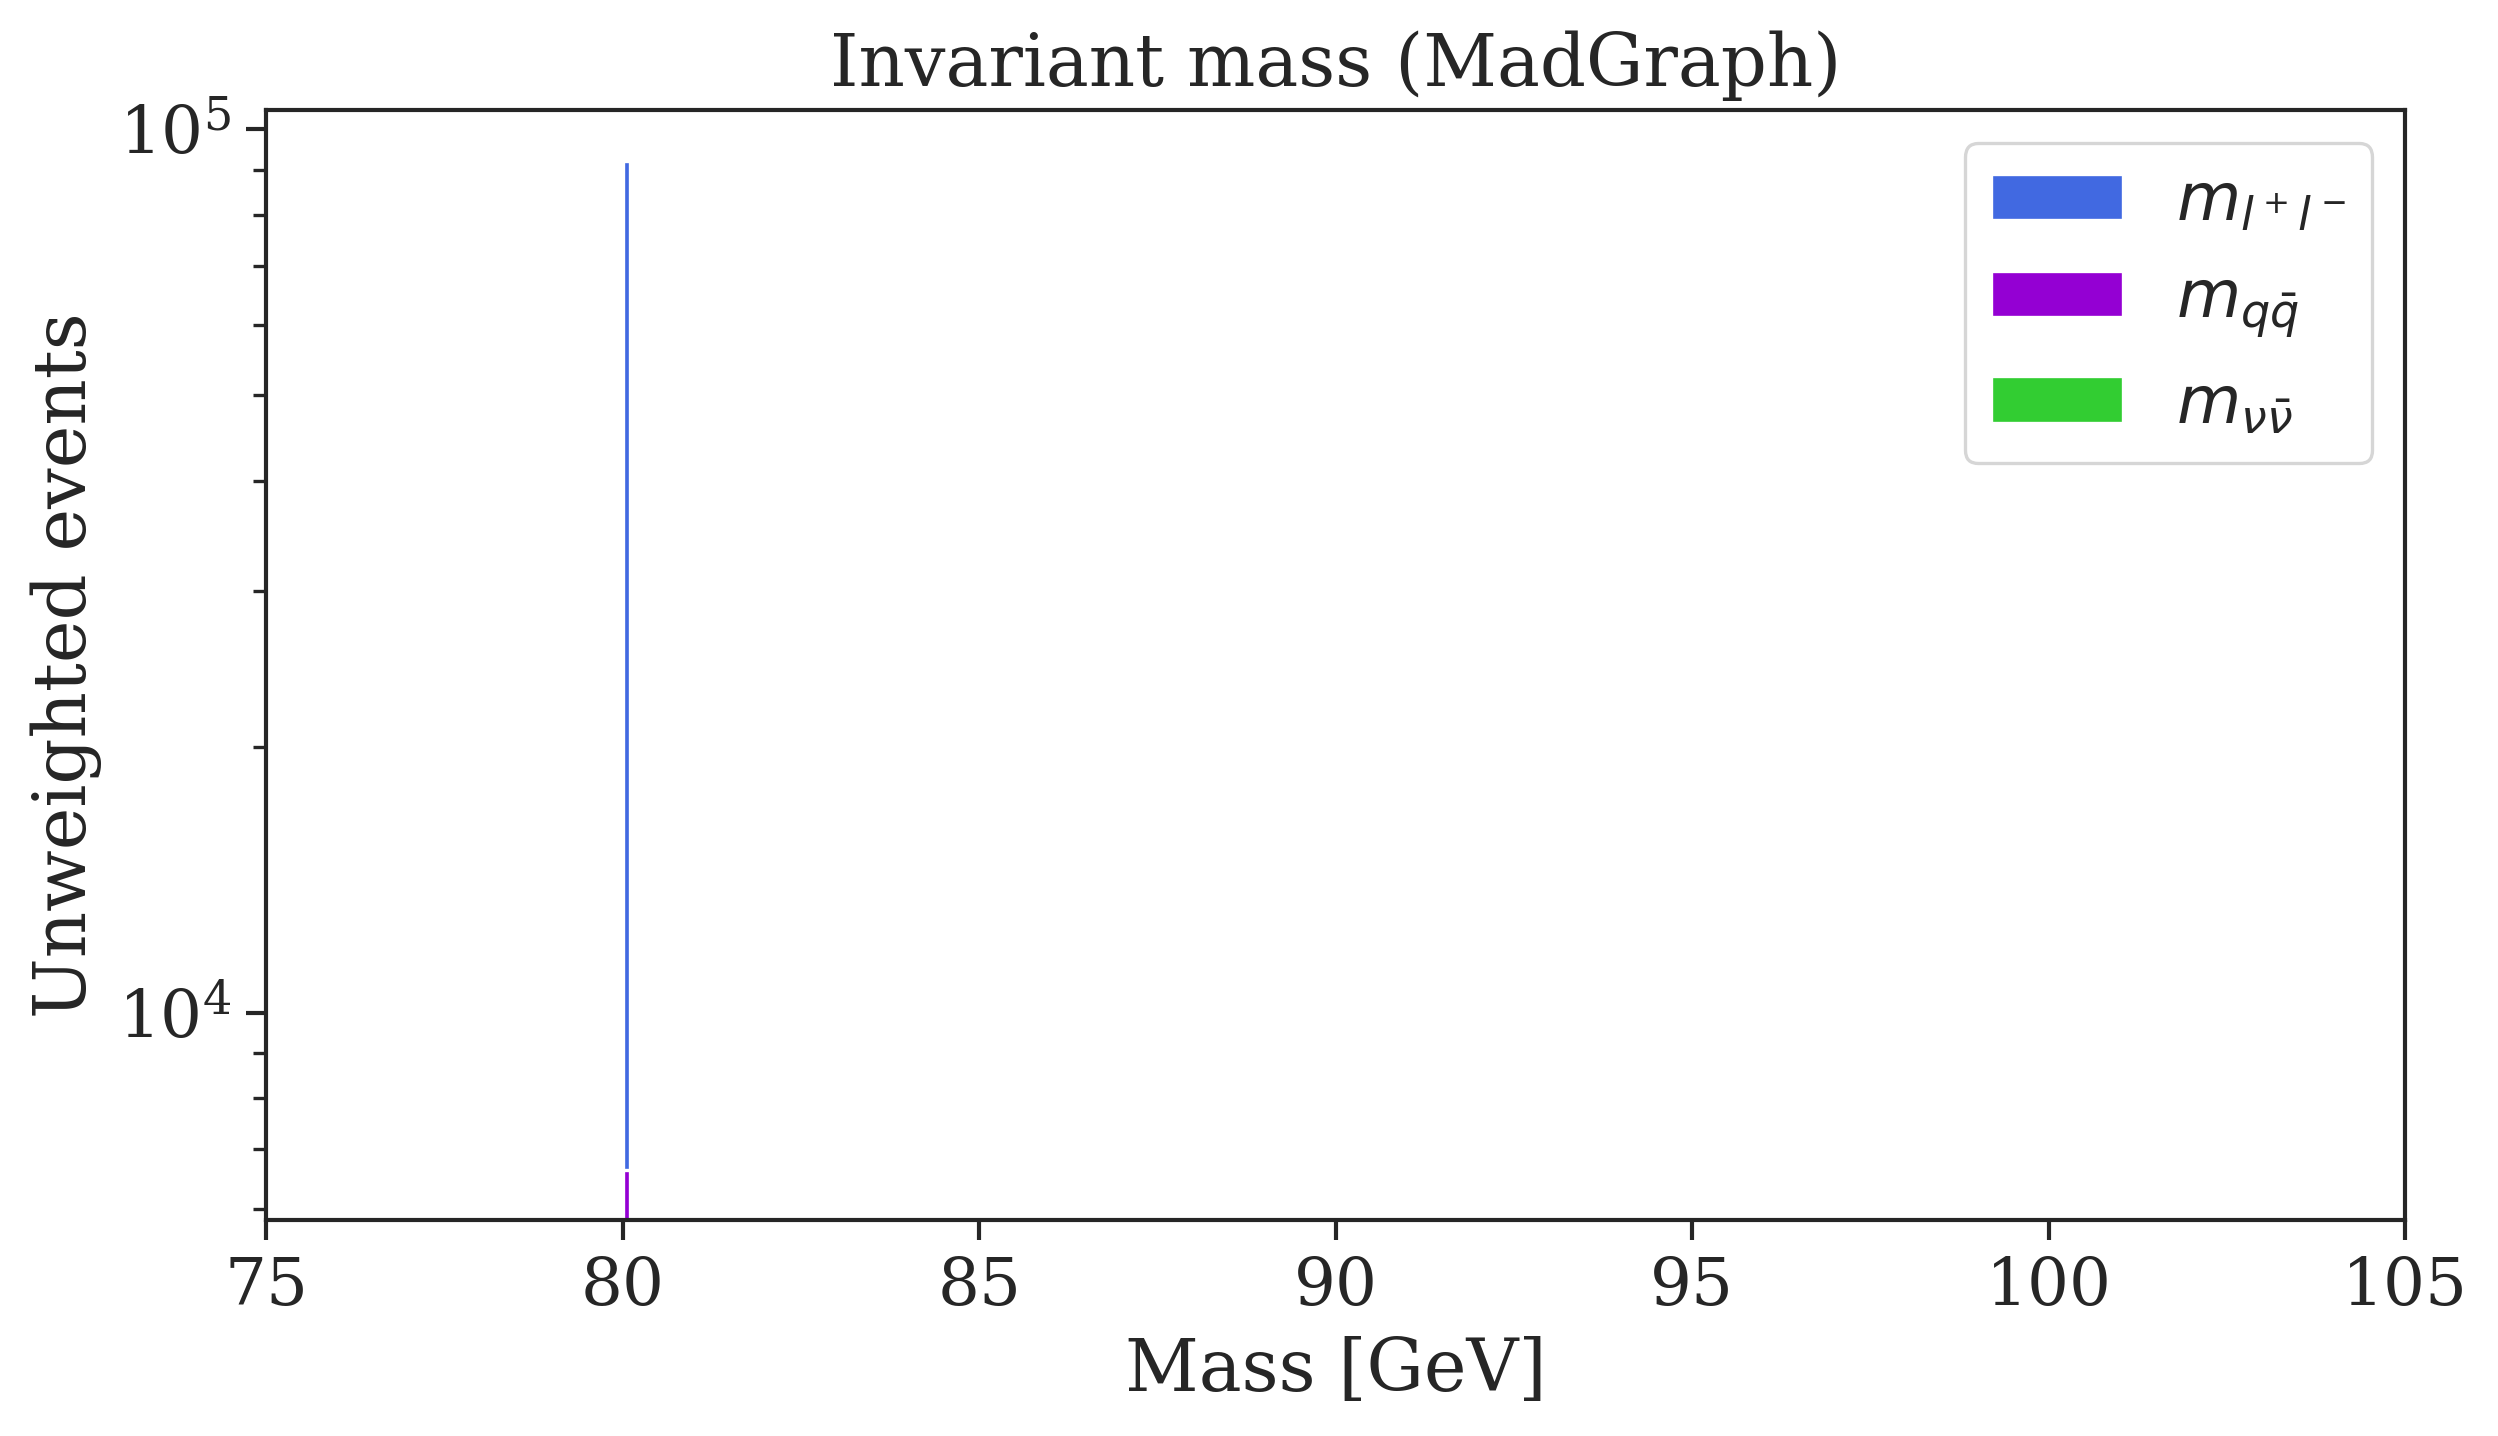

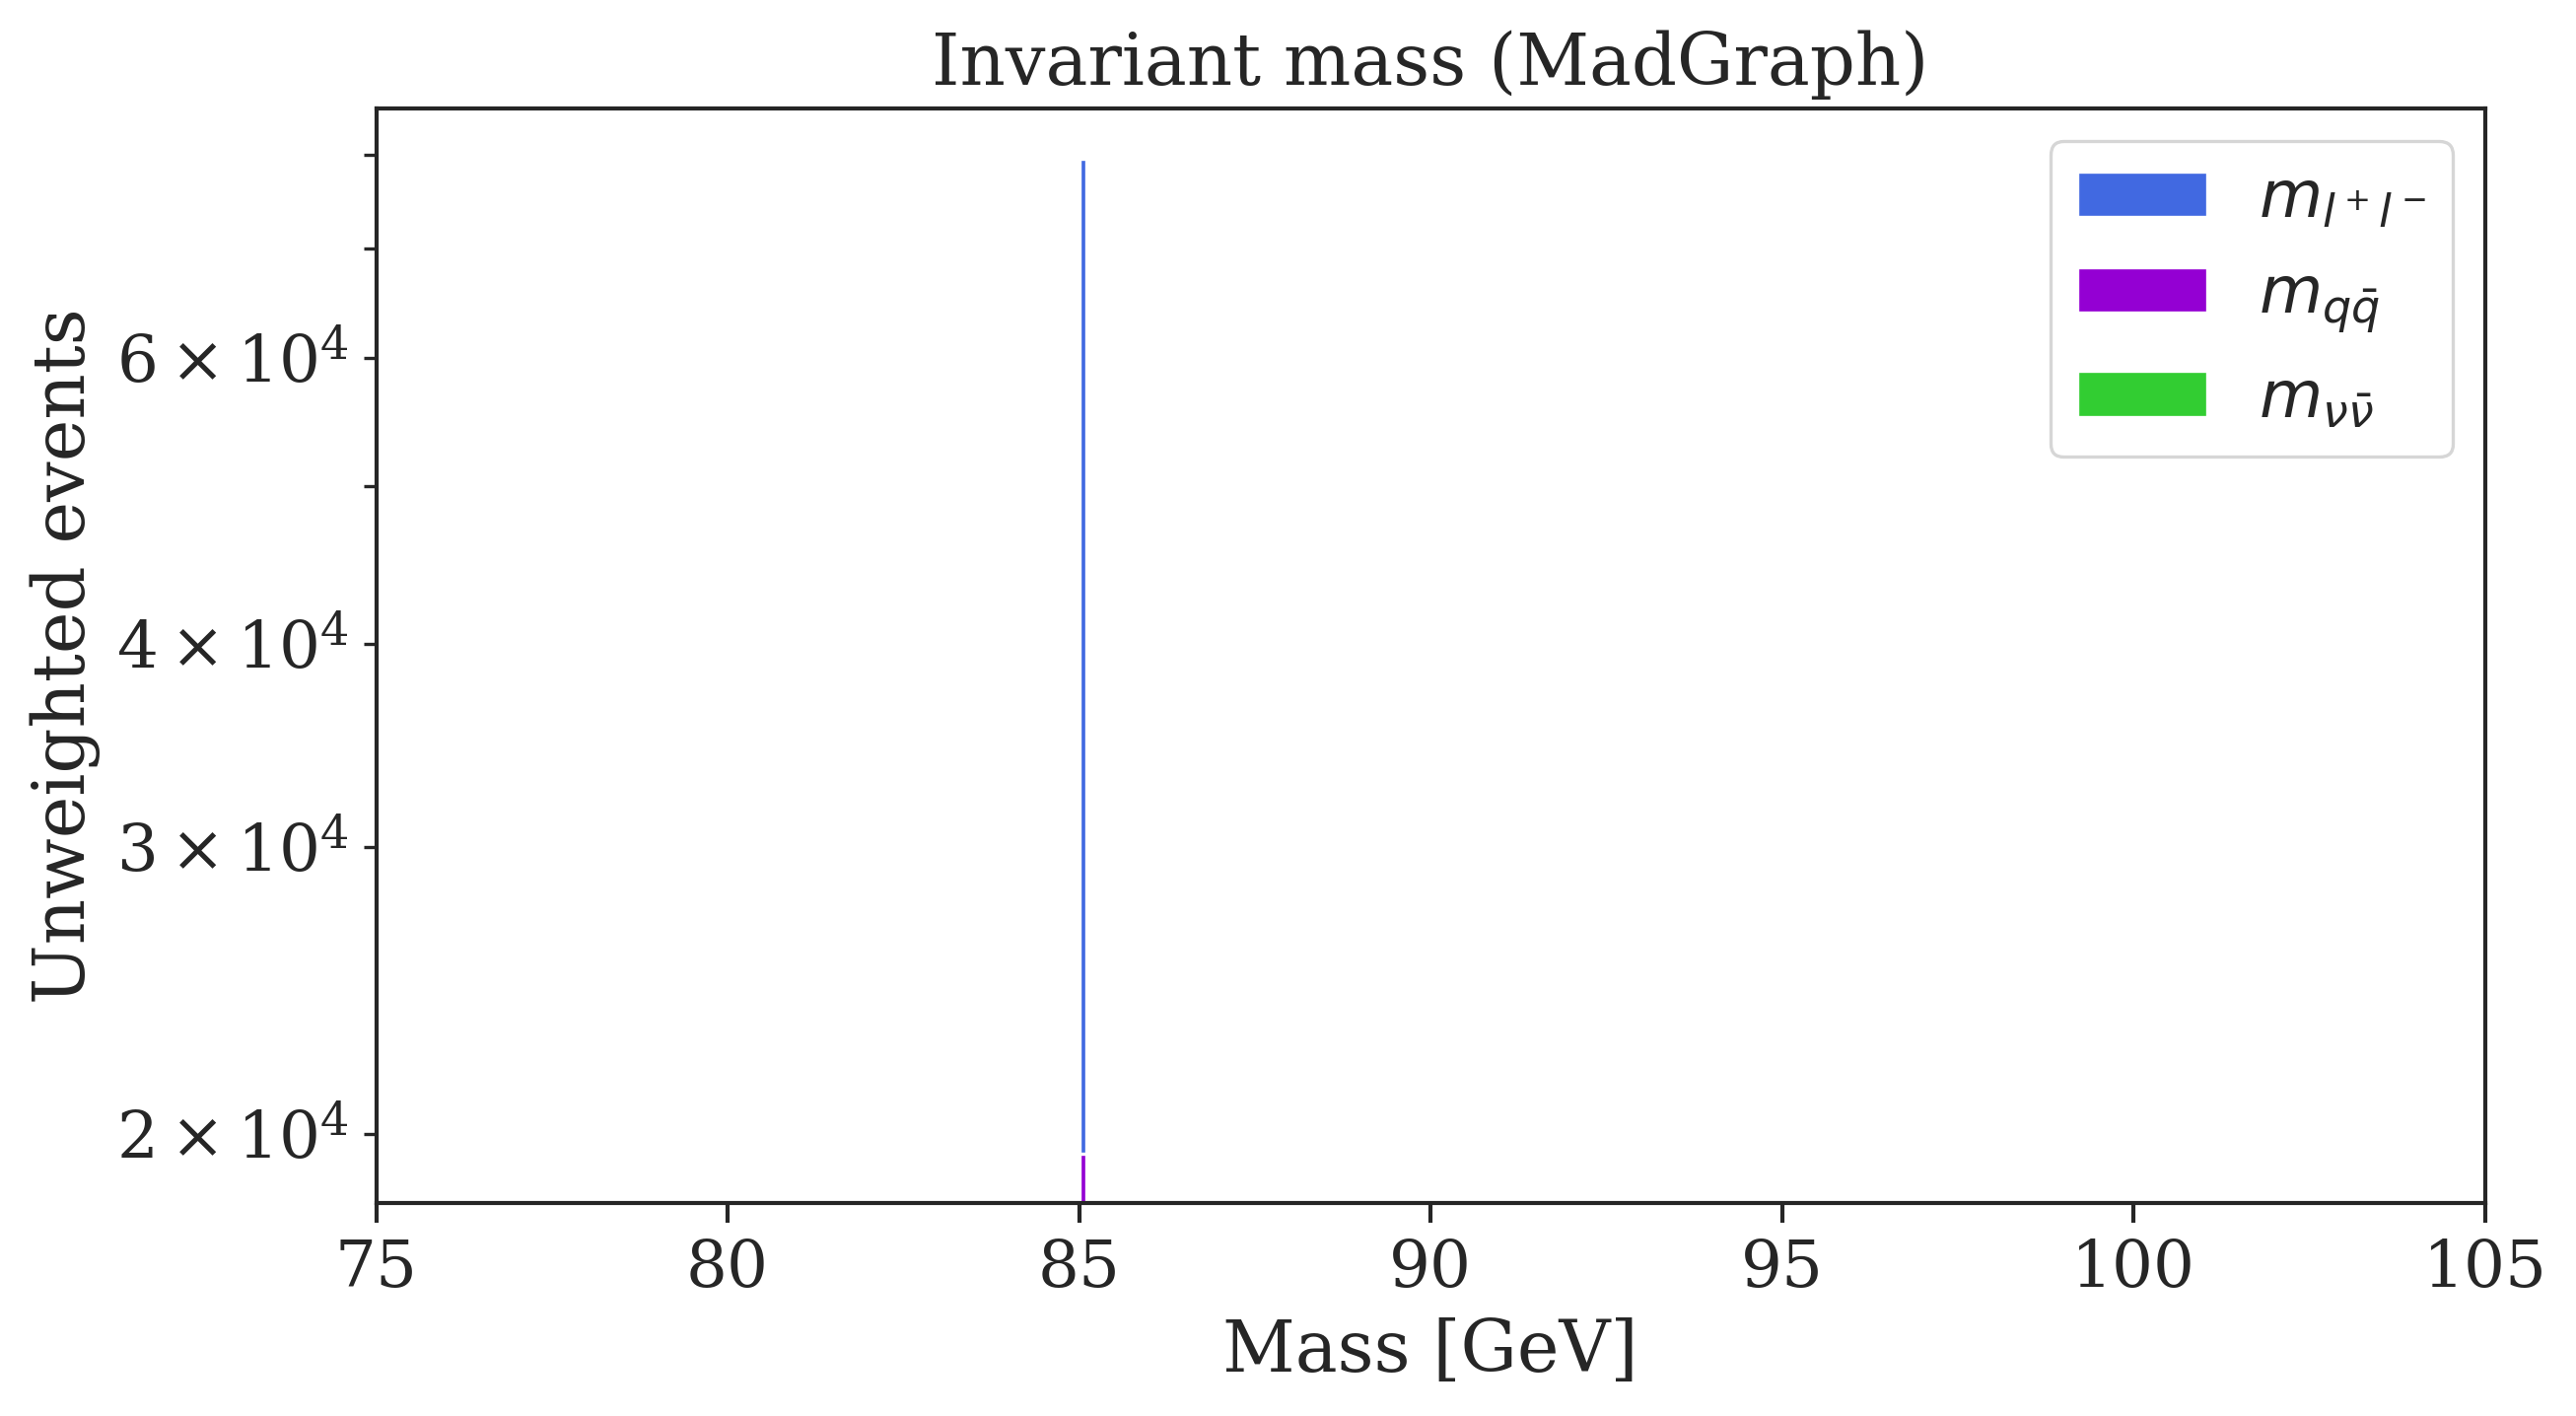

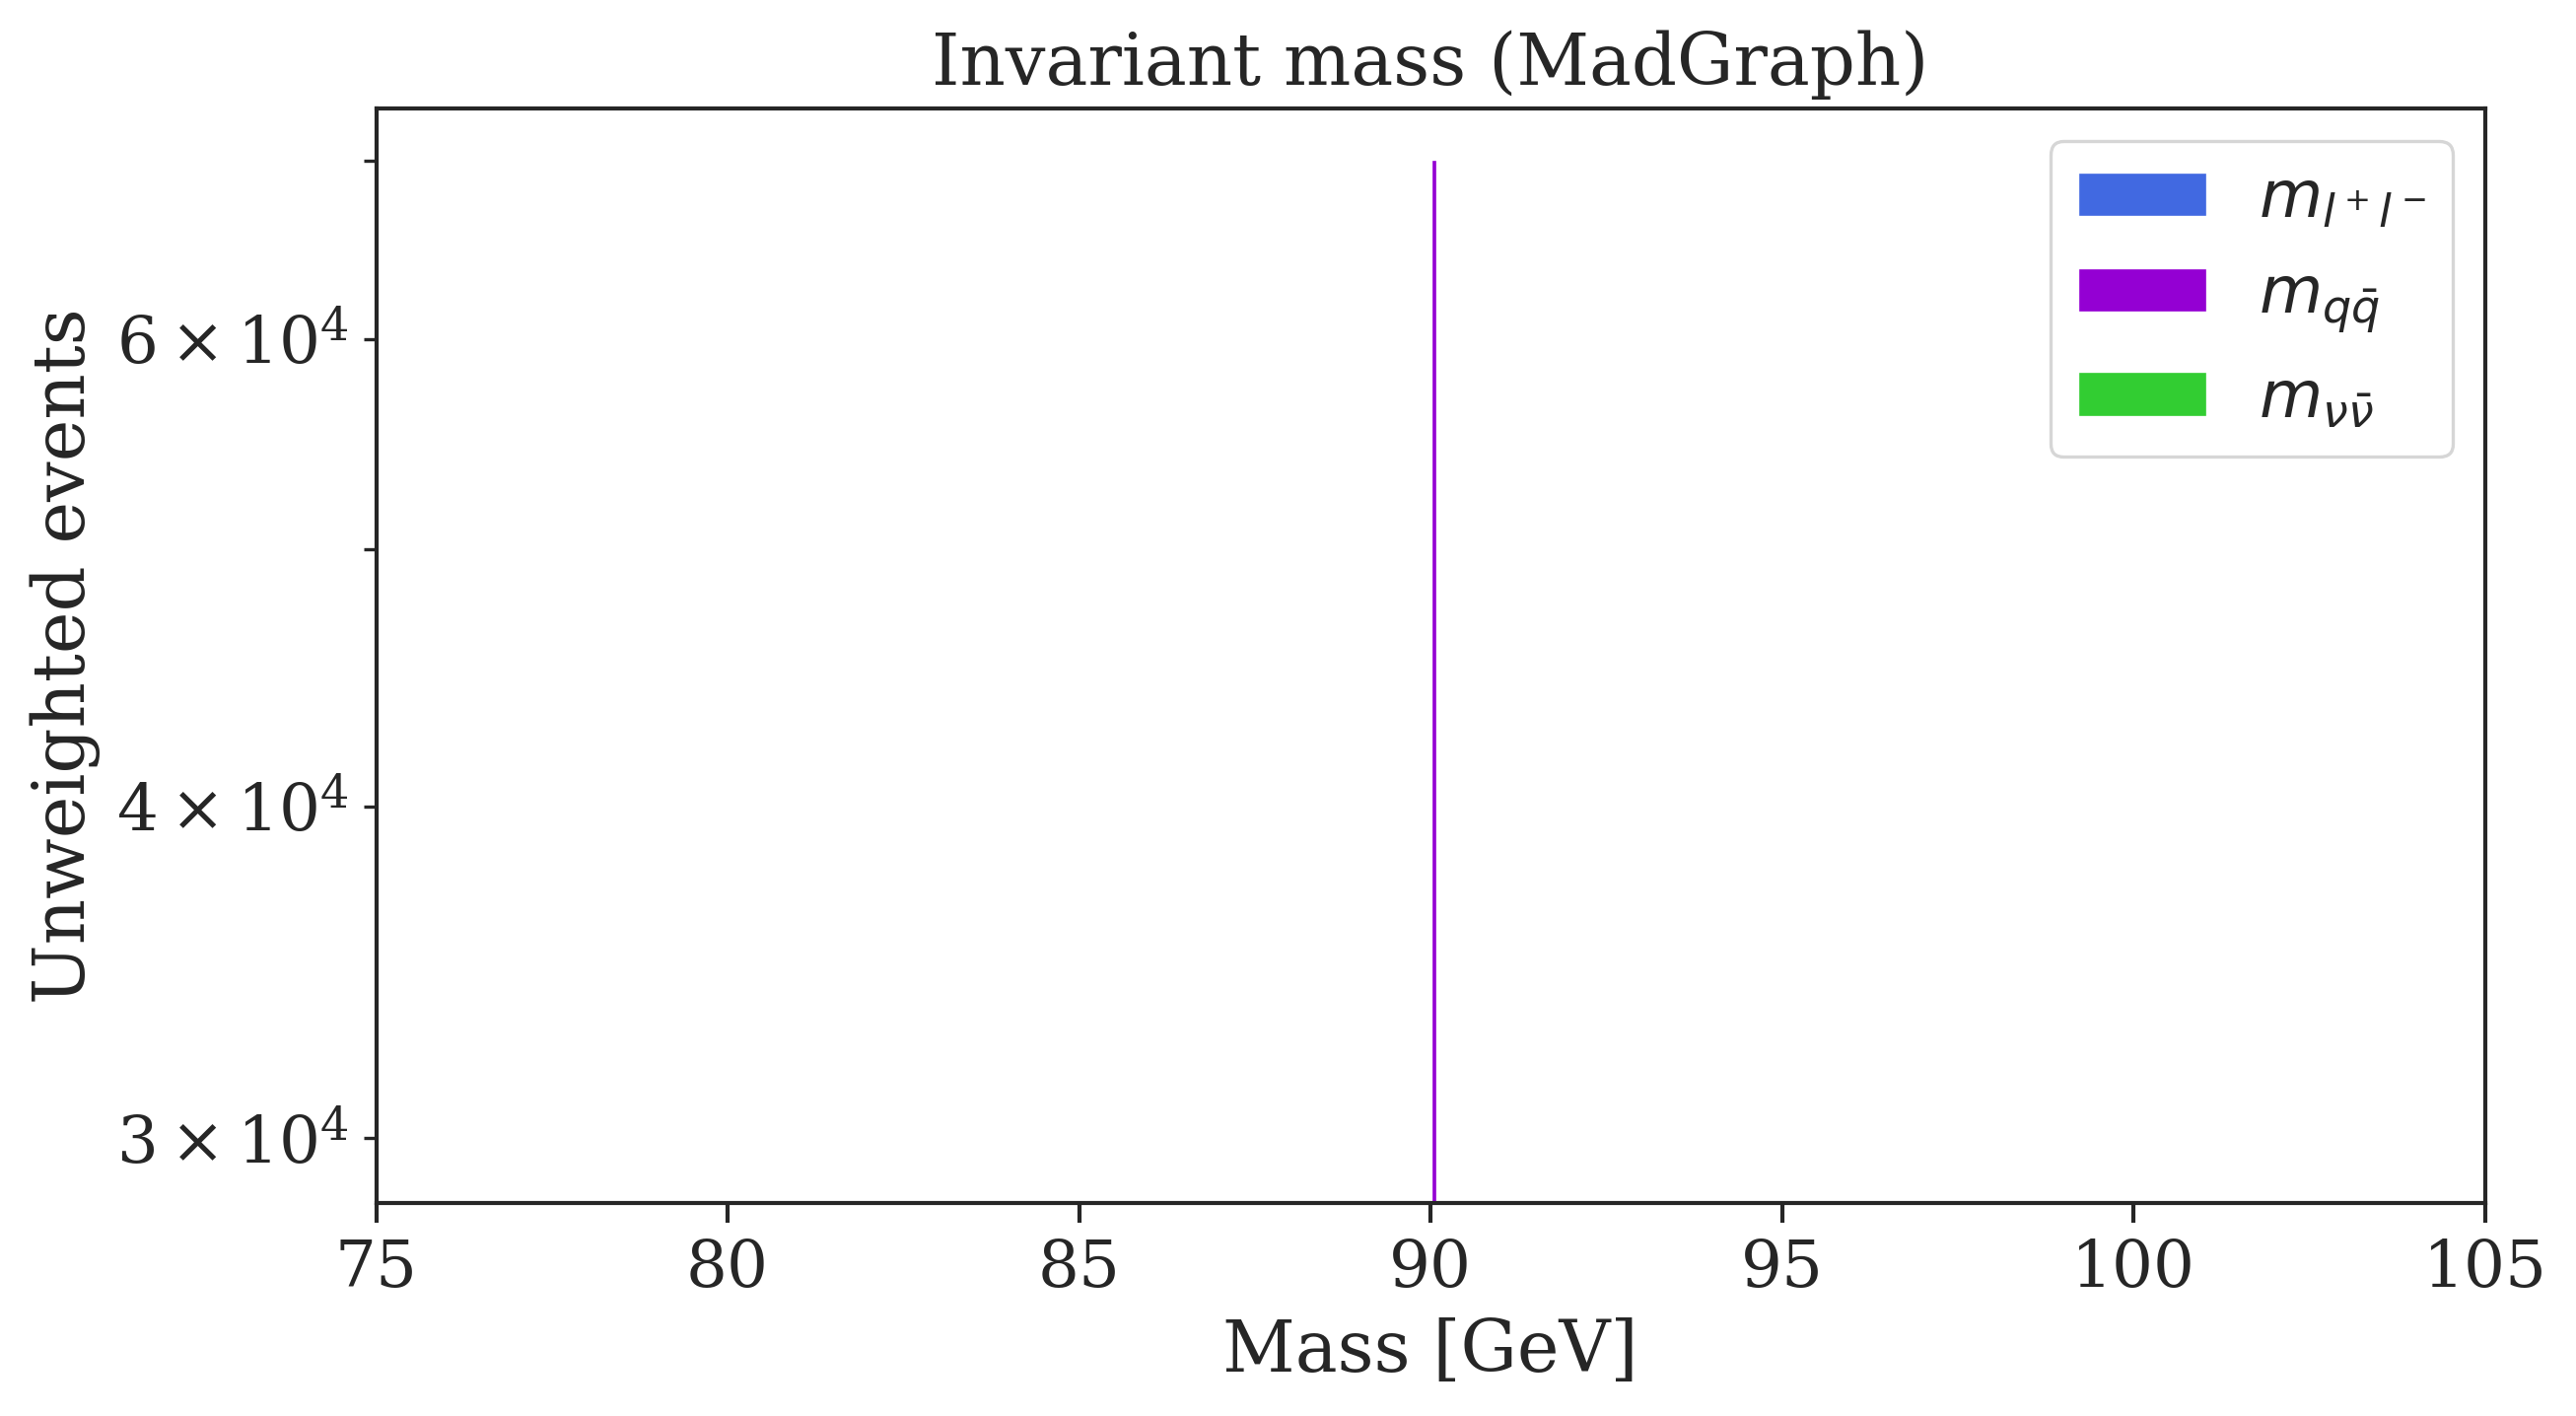

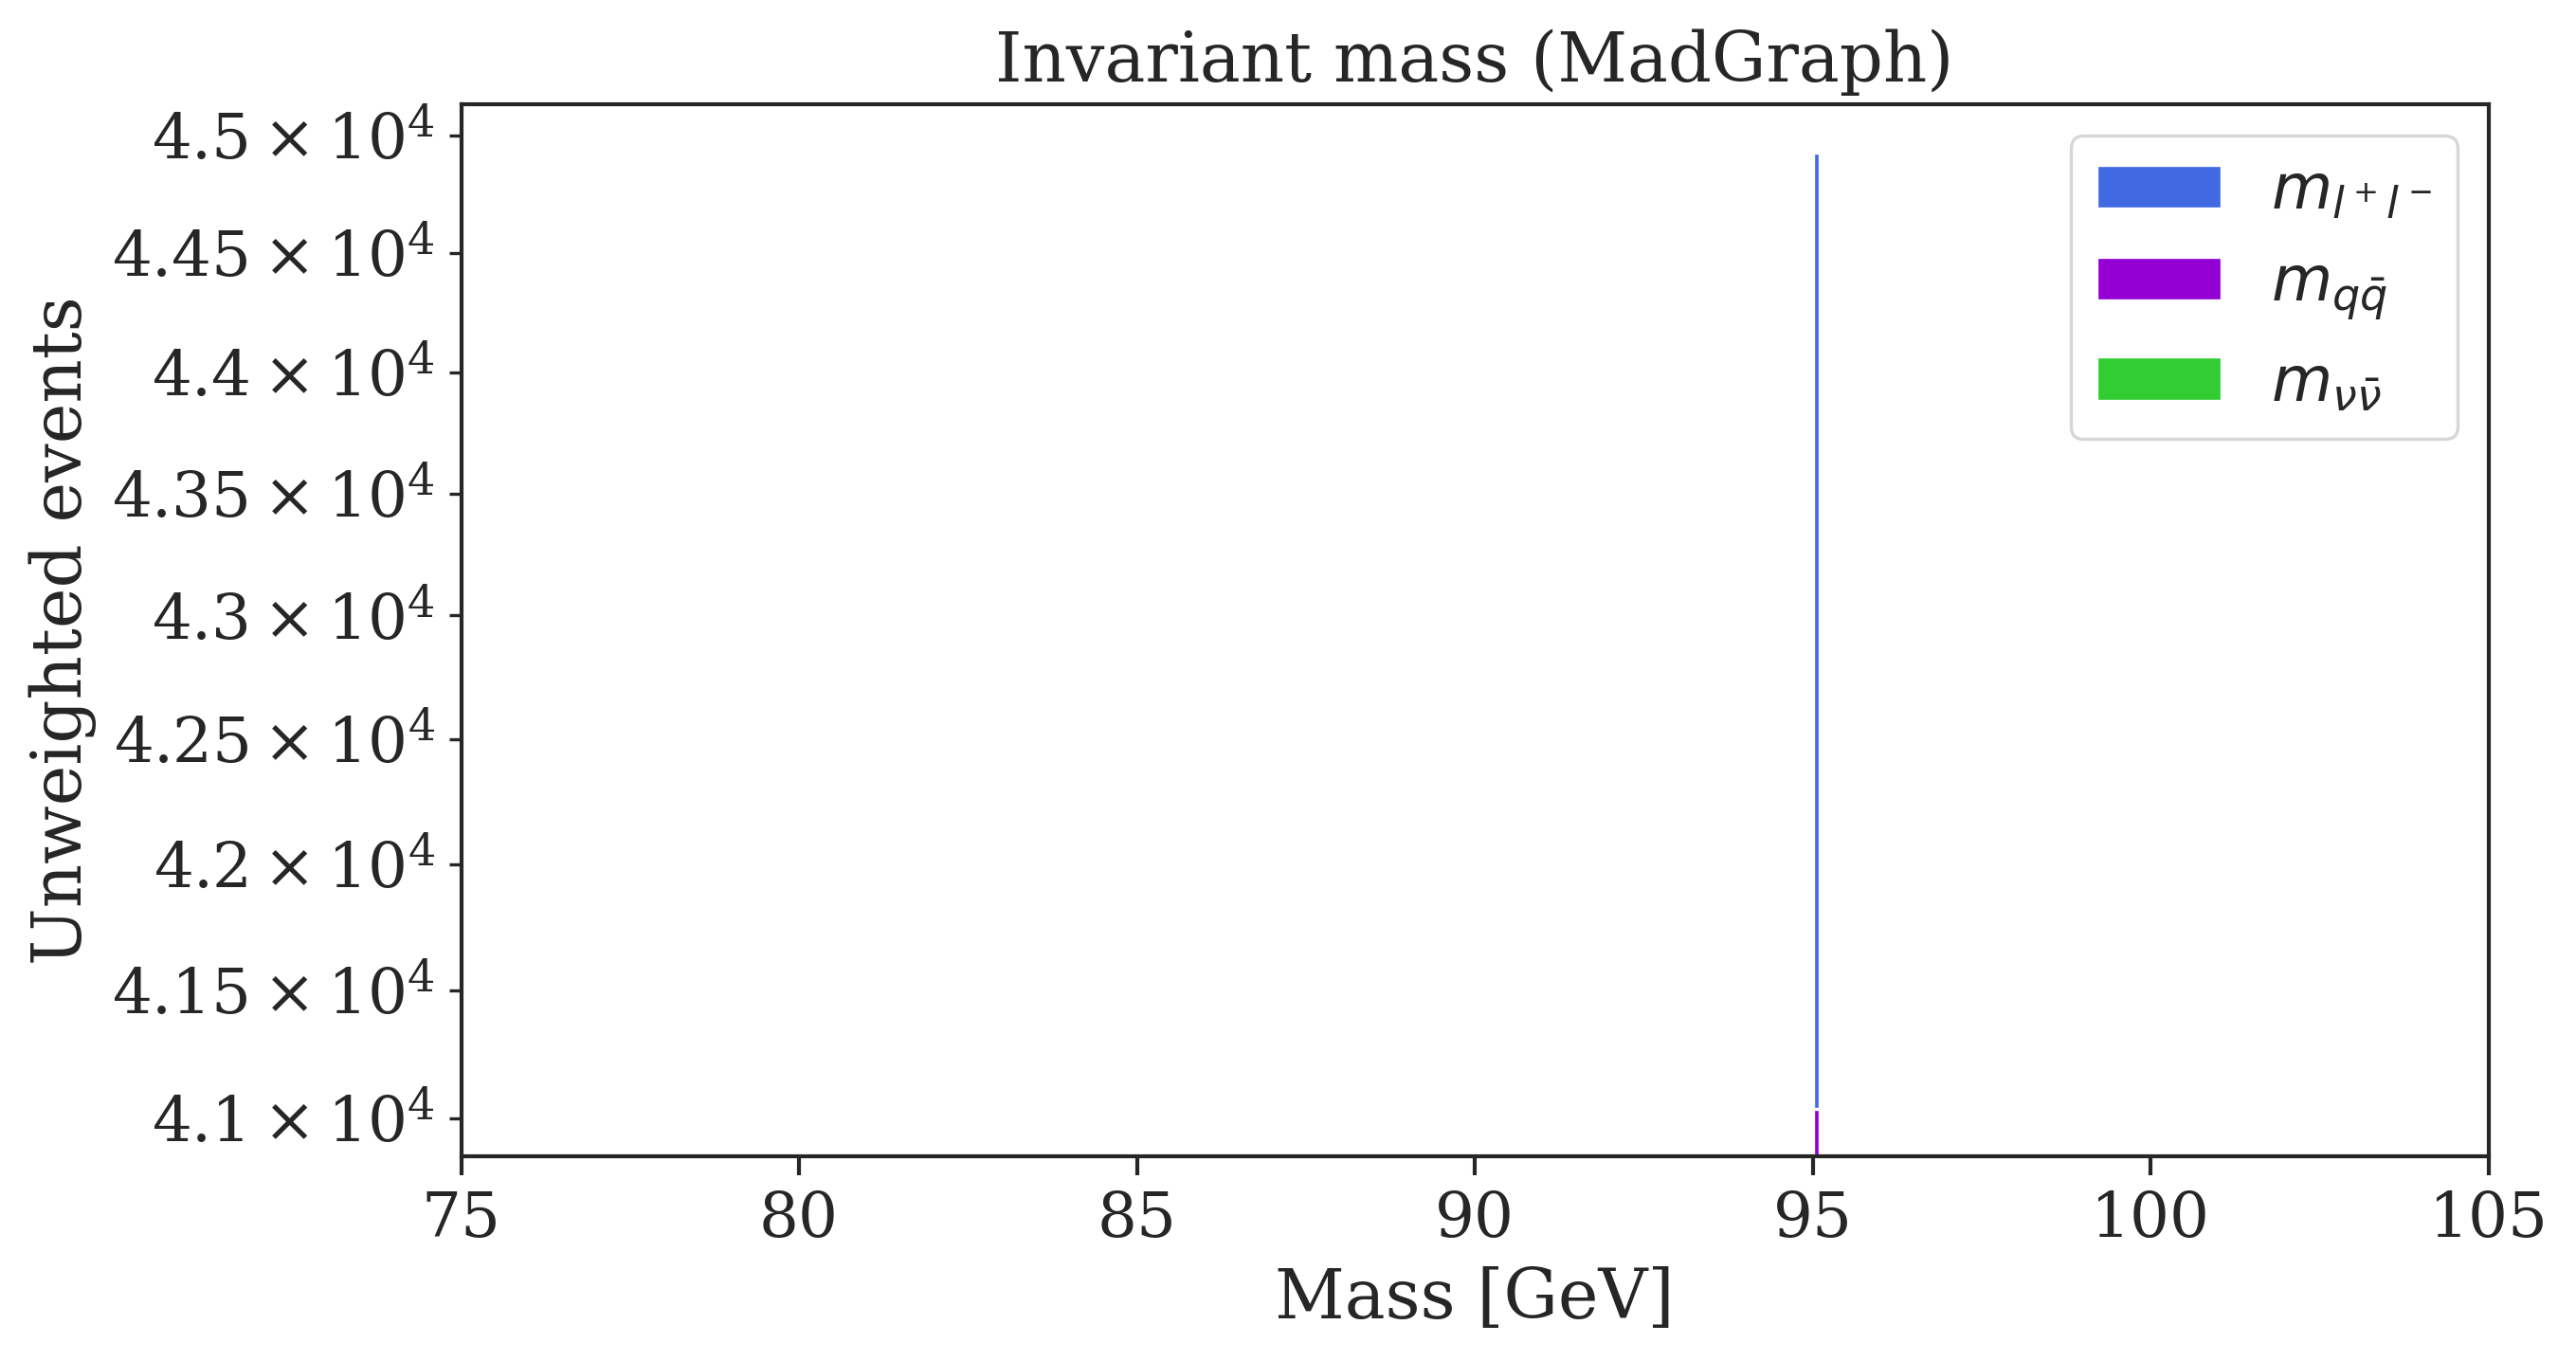

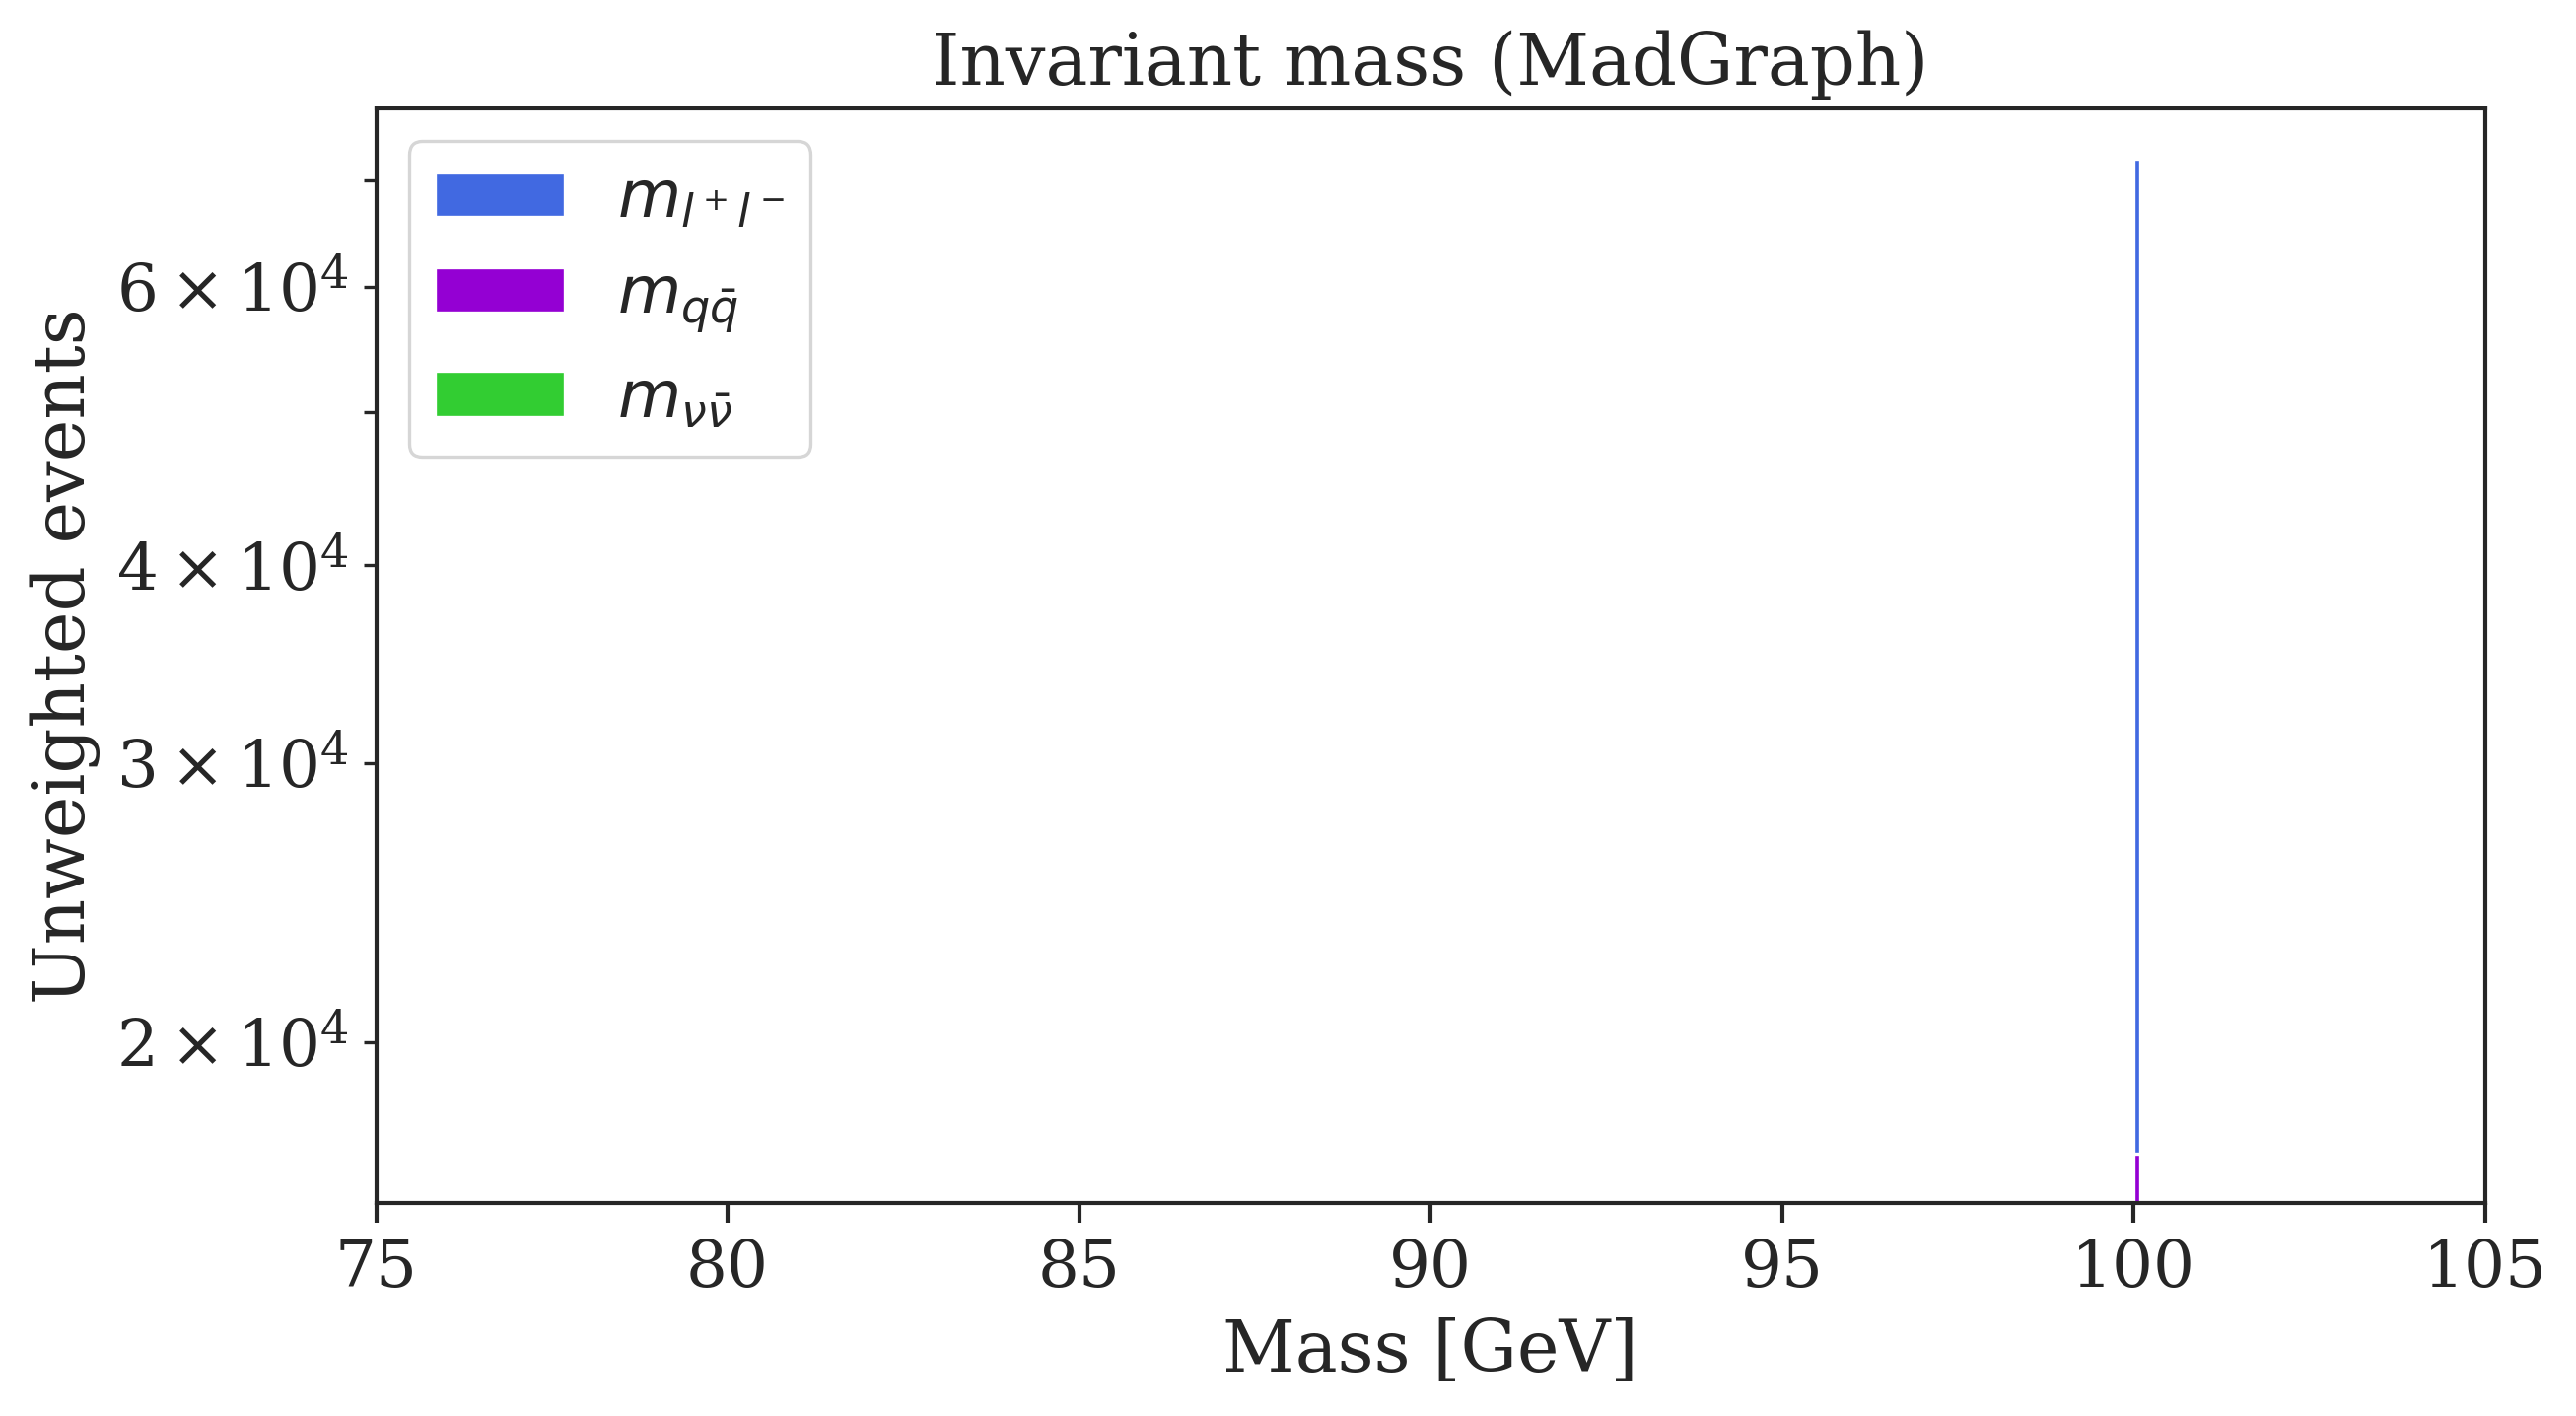

In [26]:


for energy in range(5):
    fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
    plt.hist(mDict[r'$m_{l^+l^-}$'][energy][11] + mDict[r'$m_{l^+l^-}$'][energy][13] + mDict[r'$m_{l^+l^-}$'][energy][15], color = 'royalblue', label = r'$m_{l^+l^-}$')
    plt.hist(mDict[r'$m_{q\bar{q}}$'][energy][1]+mDict[r'$m_{q\bar{q}}$'][energy][2]+mDict[r'$m_{q\bar{q}}$'][energy][3]+mDict[r'$m_{q\bar{q}}$'][energy][4]+mDict[r'$m_{q\bar{q}}$'][energy][5]+mDict[r'$m_{q\bar{q}}$'][energy][6], color = 'darkviolet', label = r'$m_{q\bar{q}}$')
    plt.hist(mDict[r'$m_{\nu\bar{\nu}}$'][energy][12] + mDict[r'$m_{\nu\bar{\nu}}$'][energy][14] + mDict[r'$m_{\nu\bar{\nu}}$'][energy][16], color = 'limegreen', label = r'$m_{\nu\bar{\nu}}$')

    plt.xlabel(r'Mass [GeV]')
    plt.title(r'Invariant mass (MadGraph)')
    plt.ylabel(r'Unweighted events')
    plt.xlim([75,105])
    plt.legend()
    plt.yscale('log')
    
    plt.show()